# Business Case Study: Audiobook app

- The data is from an audiobook app, each customer in the database has make a purchase at least once.
- The main idea is that the company shouldn't spend there money targeting individuals who are unlikely to come back.
- If we focus on client who are more likely to convert again we'll get increase the sales and profitability figures.

The model must show us which are the most important metrics for a client to come back.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

In [2]:
columns = ["ID", "Book_length(mins)_overall", "Book_length(mins)_avg", "Price_overall", "Price_avg", 
         "Review", "Review10/10", "Completion", "Minutes_listened", "Support_Request", "Last_Visited_mins_Purchase_date", 
         "Target"]
data = pd.read_csv("data/Audiobooks_data.csv", header=None)
data.columns = columns
data.set_index('ID', drop=True, inplace=True)
data.index.name =None
data.head()

Book_length(mins)_overall  Book_length(mins)_avg  Price_overall  \
994                      1620.0                   1620          19.73   
1143                     2160.0                   2160           5.33   
2059                     2160.0                   2160           5.33   
2882                     1620.0                   1620           5.96   
3342                     2160.0                   2160           5.33   

      Price_avg  Review  Review10/10  Completion  Minutes_listened  \
994       19.73       1        10.00        0.99            1603.8   
1143       5.33       0         8.91        0.00               0.0   
2059       5.33       0         8.91        0.00               0.0   
2882       5.96       0         8.91        0.42             680.4   
3342       5.33       0         8.91        0.22             475.2   

      Support_Request  Last_Visited_mins_Purchase_date  Target  
994                 5                               92       0  
1143                0                                0       0  
2059                0                              388       0  
2882                1                              129       0  
3342                0                              361       0

# 1. Getting aquainted with the dataset

- `ÌD`: is like a name.

- `Book_length(mins)_overall`: is the sum of the lengths of purchases.

- `Book_length(mins)_avg`: is the sum of the lengths of purchases divided by the number of purchases. Notice we don't need the number of purchases column because we ca get it from `Book_length(mins)_overall` / `Book_length(mins)_avg`.

- `Price_overall` & `Price_avg`: Same as Book length, the price variable is almost always a good predictor.

- `Review`: is boolean. It shows if the customer left a review. If so, `Review10/10` saves the review left by the user. While most users don't left a review we fill the missing reviews by avrage review column.

- `Minutes_listened`: is a measure of engagement, the total of minutes the user listen to audiobooks.

- `Completion`: is the `Minutes_listened` / `Book_length(mins)_overall`.

- `Support_Request`: Shows the total number of support request (forgotten password to assistance).

- `Last_Visited_mins_Purchase_date`: the bigger the difference, the bigger sooner the engagement. If the value is 0, we are sure the customer has never accessed what he/she has bought.

The data was gathered from the audiobook app, the input data represents `2 years` worth of engagement. We are doing supervised learning so we need `target`. We took extra `6 month` to check if the user converted or not. 1 if the customer buys in the next 6 months, 0 if the customer didn't.

- `target`: 1 if the customer bought again in the last 6 months of data. 0 if the customer did not buy again.

In [3]:
pd.set_option("display.float_format", "{:.2f}".format)
data.describe()

Book_length(mins)_overall  Book_length(mins)_avg  Price_overall  \
count                   14084.00               14084.00       14084.00   
mean                     1591.28                1678.61           7.10   
std                       504.34                 654.84           4.93   
min                       216.00                 216.00           3.86   
25%                      1188.00                1188.00           5.33   
50%                      1620.00                1620.00           5.95   
75%                      2160.00                2160.00           8.00   
max                      2160.00                7020.00         130.94   

       Price_avg   Review  Review10/10  Completion  Minutes_listened  \
count   14084.00 14084.00     14084.00    14084.00          14084.00   
mean        7.54     0.16         8.91        0.13            189.89   
std         5.56     0.37         0.64        0.24            371.08   
min         3.86     0.00         1.00        0.00              0.00   
25%         5.33     0.00         8.91        0.00              0.00   
50%         6.07     0.00         8.91        0.00              0.00   
75%         8.00     0.00         8.91        0.13            194.40   
max       130.94     1.00        10.00        1.00           2160.00   

       Support_Request  Last_Visited_mins_Purchase_date   Target  
count         14084.00                         14084.00 14084.00  
mean              0.07                            61.94     0.16  
std               0.47                            88.21     0.37  
min               0.00                             0.00     0.00  
25%               0.00                             0.00     0.00  
50%               0.00                            11.00     0.00  
75%               0.00                           105.00     0.00  
max              30.00                           464.00     1.00

In [4]:
data.isnull().sum()

Book_length(mins)_overall          0
Book_length(mins)_avg              0
Price_overall                      0
Price_avg                          0
Review                             0
Review10/10                        0
Completion                         0
Minutes_listened                   0
Support_Request                    0
Last_Visited_mins_Purchase_date    0
Target                             0
dtype: int64

# 2. Exploratory Data Analysis

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14084 entries, 994 to 251
Data columns (total 11 columns):
Book_length(mins)_overall          14084 non-null float64
Book_length(mins)_avg              14084 non-null int64
Price_overall                      14084 non-null float64
Price_avg                          14084 non-null float64
Review                             14084 non-null int64
Review10/10                        14084 non-null float64
Completion                         14084 non-null float64
Minutes_listened                   14084 non-null float64
Support_Request                    14084 non-null int64
Last_Visited_mins_Purchase_date    14084 non-null int64
Target                             14084 non-null int64
dtypes: float64(6), int64(5)
memory usage: 1.3 MB


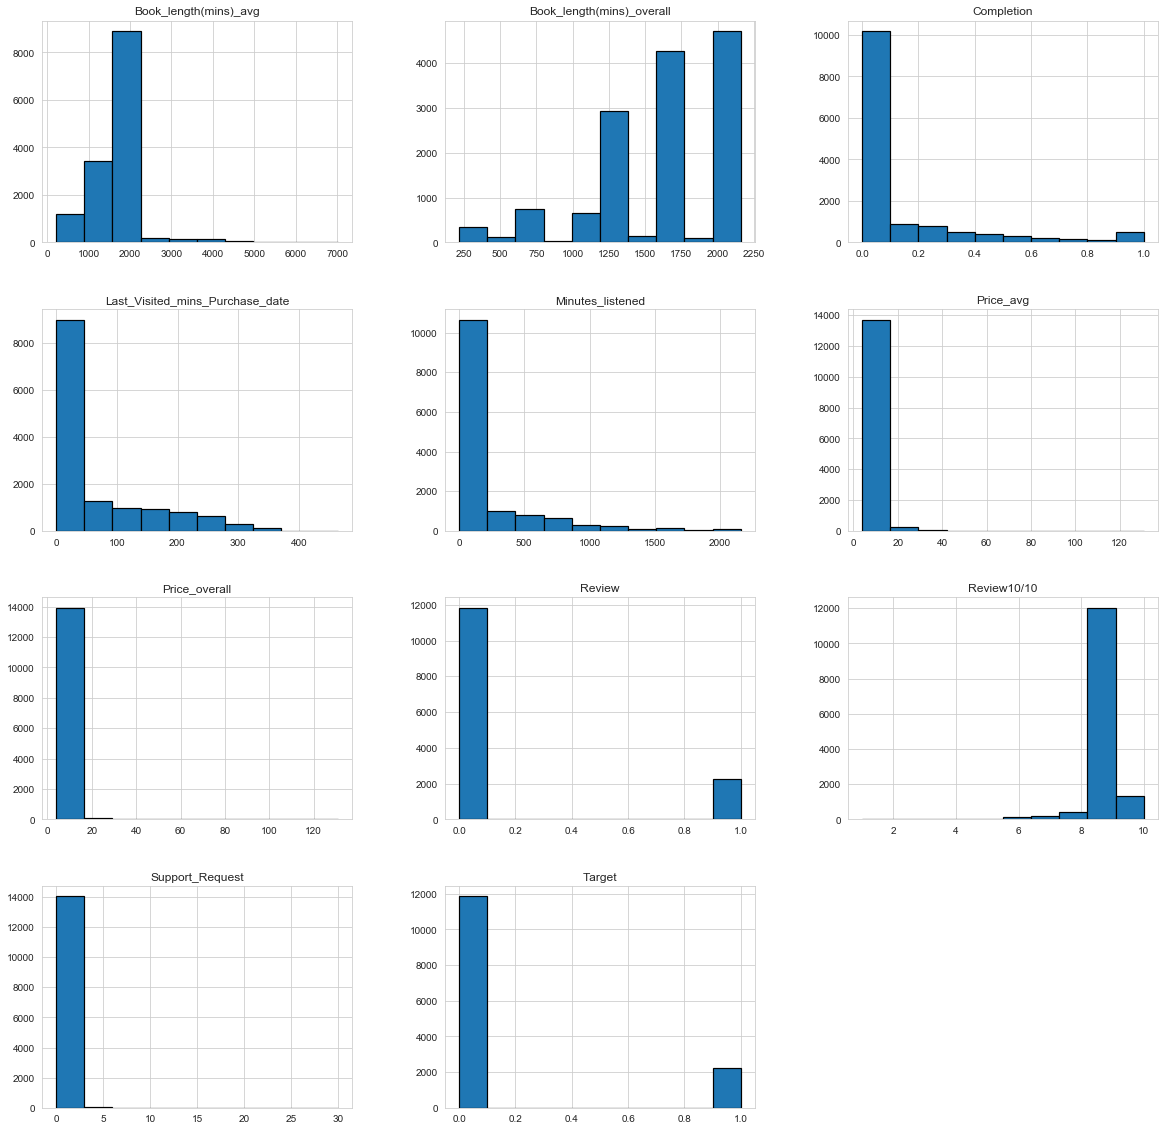

In [6]:
# Visulazing the distibution of the data for every feature
data.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

In [7]:
print(f"{data.Target.value_counts()}")
print(f"{data.Target.value_counts()[0] / data.Target.value_counts()[1]}")

0    11847
1     2237
Name: Target, dtype: int64
5.295932051855163


It is important to notice that our `target` variable is inbabalanced. We have only `2237` user who convert again in the `6 month` period. The data need to be balanced.

In [8]:
len(list(data.columns))

11

# 3. Data Pre-processing

- a) Balance the dataset. 

Since we are dealing with real life data, we will need to preprocess it a bit. This is the relevant code which is not that hard but refers to data engineering more than machine learning.

- b) Divide the dataset in training, validation, and test.

In [9]:
data_1 = pd.get_dummies(data, columns=["Support_Request", "Review"])
data_1.head()

Book_length(mins)_overall  Book_length(mins)_avg  Price_overall  \
994                     1620.00                   1620          19.73   
1143                    2160.00                   2160           5.33   
2059                    2160.00                   2160           5.33   
2882                    1620.00                   1620           5.96   
3342                    2160.00                   2160           5.33   

      Price_avg  Review10/10  Completion  Minutes_listened  \
994       19.73        10.00        0.99           1603.80   
1143       5.33         8.91        0.00              0.00   
2059       5.33         8.91        0.00              0.00   
2882       5.96         8.91        0.42            680.40   
3342       5.33         8.91        0.22            475.20   

      Last_Visited_mins_Purchase_date  Target  Support_Request_0  ...  \
994                                92       0                  0  ...   
1143                                0       0                  1  ...   
2059                              388       0                  1  ...   
2882                              129       0                  0  ...   
3342                              361       0                  1  ...   

      Support_Request_4  Support_Request_5  Support_Request_6  \
994                   0                  1                  0   
1143                  0                  0                  0   
2059                  0                  0                  0   
2882                  0                  0                  0   
3342                  0                  0                  0   

      Support_Request_7  Support_Request_8  Support_Request_10  \
994                   0                  0                   0   
1143                  0                  0                   0   
2059                  0                  0                   0   
2882                  0                  0                   0   
3342                  0                  0                   0   

      Support_Request_12  Support_Request_30  Review_0  Review_1  
994                    0                   0         0         1  
1143                   0                   0         1         0  
2059                   0                   0         1         0  
2882                   0                   0         1         0  
3342                   0                   0         1         0  

[5 rows x 23 columns]

In [10]:
X = data_1.drop('Target', axis=1)
y = data_1.Target

## Trying Logistic Regression without balancing the dataset

In [26]:
def accuracy_report(y_test, y_test_pred):
    print(f"=========test data============ :\n=>Accuracy Score {accuracy_score(y_test, y_test_pred)}")
    print(f"=>Confusion Matrix :\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"=>Classification Report :\n{classification_report(y_test, y_test_pred)}")

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

x_sc = StandardScaler()
X_std = x_sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

model = LogisticRegression(solver='liblinear', max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [33]:
accuracy_report(y_test, y_pred)

=========test data============ :
=>Accuracy Score 0.9034433794817182
=>Confusion Matrix :
[[2358   30]
 [ 242  187]]
=>Classification Report :
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2388
           1       0.86      0.44      0.58       429

    accuracy                           0.90      2817
   macro avg       0.88      0.71      0.76      2817
weighted avg       0.90      0.90      0.89      2817



In [39]:
scores = cross_val_score(model, X_std, y, cv=10)
scores.mean()

0.9006674525577527

## Trying Logistic Regression with balanced dataset

### 1. Up-sample Minority Class

In [34]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = data[data.Target==0]
df_minority = data[data.Target==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=11847,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
X = df_upsampled.drop('Target', axis=1)
y = df_upsampled.Target
# Display new class counts
df_upsampled.Target.value_counts()

1    11847
0    11847
Name: Target, dtype: int64

In [35]:
x_sc = StandardScaler()
X_std = x_sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

model = LogisticRegression(solver='liblinear', max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [36]:
accuracy_report(y_test, y_pred)

=========test data============ :
=>Accuracy Score 0.7963705423085039
=>Confusion Matrix :
[[2128  256]
 [ 709 1646]]
=>Classification Report :
              precision    recall  f1-score   support

           0       0.75      0.89      0.82      2384
           1       0.87      0.70      0.77      2355

    accuracy                           0.80      4739
   macro avg       0.81      0.80      0.79      4739
weighted avg       0.81      0.80      0.79      4739



### 2. Down-sample Majority Class

In [37]:
# Separate majority and minority classes
df_majority = data[data.Target==0]
df_minority = data[data.Target==1]
 
# Upsample minority class
df_majority_downsample = resample(df_majority, 
                                 replace=False,     # sample with replacement
                                 n_samples=2237,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority_downsample, df_minority])
 
X = df_upsampled.drop('Target', axis=1)
y = df_upsampled.Target
# Display new class counts
df_upsampled.Target.value_counts()

1    2237
0    2237
Name: Target, dtype: int64

In [38]:
x_sc = StandardScaler()
X_std = x_sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

model = LogisticRegression(solver='liblinear', max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [39]:
accuracy_report(y_test, y_pred)

=========test data============ :
=>Accuracy Score 0.8055865921787709
=>Confusion Matrix :
[[404  55]
 [119 317]]
=>Classification Report :
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       459
           1       0.85      0.73      0.78       436

    accuracy                           0.81       895
   macro avg       0.81      0.80      0.80       895
weighted avg       0.81      0.81      0.80       895



### 3. Penalize Algorithms (Cost-Sensitive Training)

In [ ]:
from sklearn.svm import SVC

X = data_1.drop('Target', axis=1)
y = data_1.Target

x_sc = StandardScaler()
X_std = x_sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

model = SVC(kernel='linear', 
            class_weight='balanced', # penalize
            probability=True)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
print(f"========Train data============ :\n=>Accuracy Score {accuracy_score(y_train, y_train_pred)}")
print(f"=>Confusion Matrix :\n{confusion_matrix(y_train, y_train_pred)}")

print(f"=========test data============ :\n=>Accuracy Score {accuracy_score(y_test, y_test_pred)}")
print(f"=>Confusion Matrix :\n{confusion_matrix(y_test, y_test_pred)}")
print(f"=>Classification Report :\n{classification_report(y_test, y_test_pred)}")

### 4. Use Tree-Based Algorithms

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = data_1.drop('Target', axis=1)
y = data_1.Target

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)